# PART 1

## European options 1:
### Vanilla Call / Put

#### Black-Scholes model

In [4]:
import numpy as np
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


#### Bachelier model

In [6]:
def bachelier(S, K, T, r, sigma, option_type="call"):
    # Forward price
    F = S * np.exp(r * T)
    d = (F - K) / (sigma * np.sqrt(T))
    
    if option_type == "call":
        price = sigma * np.sqrt(T) * (d * norm.cdf(d) + norm.pdf(d))
    elif option_type == "put":
        price = sigma * np.sqrt(T) * (-d * norm.cdf(-d) + norm.pdf(d))
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


#### Black model

In [8]:
def black_model(F, K, T, r, sigma, option_type="call"):
    d1 = (np.log(F / K) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        price = np.exp(-r * T) * (F * norm.cdf(d1) - K * norm.cdf(d2))
    elif option_type == "put":
        price = np.exp(-r * T) * (K * norm.cdf(-d2) - F * norm.cdf(-d1))
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


#### Displaced-diffusion model

In [10]:
def displaced_diffusion(S, K, T, r, sigma, b, option_type="call"):
    # Adjusted price and strike
    S_adj = b * S + (1 - b) * K
    K_adj = b * K + (1 - b) * S
    sigma_adj = sigma * b

    # Black-Scholes style d1 and d2
    d1 = (np.log(S_adj / K_adj) + (r + 0.5 * sigma_adj**2) * T) / (sigma_adj * np.sqrt(T))
    d2 = d1 - sigma_adj * np.sqrt(T)
    
    if option_type == "call":
        price = S_adj * norm.cdf(d1) - K_adj * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        price = K_adj * np.exp(-r * T) * norm.cdf(-d2) - S_adj * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


In [11]:
# Parameters
S = 100      # Spot price
K = 110      # Strike price
T = 1        # Time to maturity (1 year)
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility
b = 0.7      # Displacement factor (for Displaced Diffusion)
F = S * np.exp(r * T)  # Forward price (for Black Model)

# Calculate option prices
bs_call = black_scholes(S, K, T, r, sigma, option_type="call")
bachelier_call = bachelier(S, K, T, r, sigma, option_type="call")
black_call = black_model(F, K, T, r, sigma, option_type="call")
displaced_call = displaced_diffusion(S, K, T, r, sigma, b, option_type="call")

print(f"Black-Scholes Call Price: {bs_call}")
print(f"Bachelier Call Price: {bachelier_call}")
print(f"Black Model Call Price: {black_call}")
print(f"Displaced Diffusion Call Price: {displaced_call}")


Black-Scholes Call Price: 6.040088129724239
Bachelier Call Price: 1.6668078130941398e-133
Black Model Call Price: 6.040088129724236
Displaced Diffusion Call Price: 6.343876342051125


## European options 2:
### Digital cash-or-nothing call / put

#### Black-Scholes model
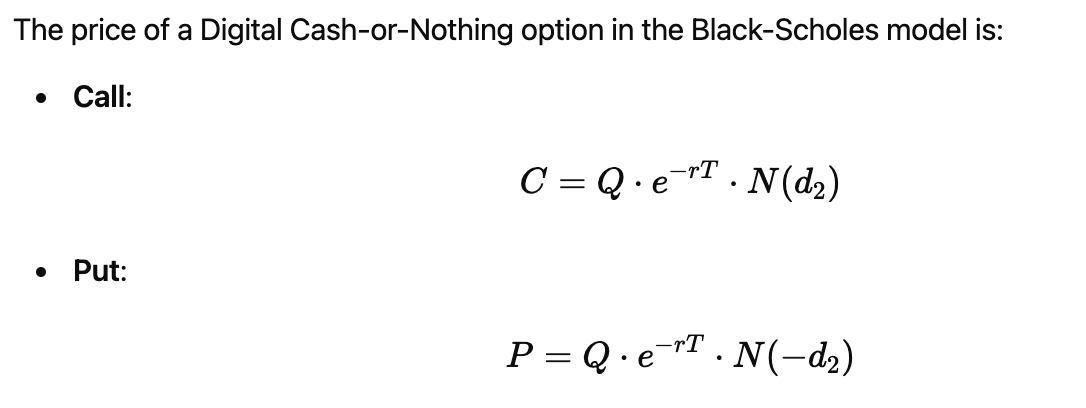

In [14]:
def digital_cash_or_nothing_black_scholes(S, K, T, r, sigma, Q, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        price = Q * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        price = Q * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


In [15]:
S = 100     # Spot price
K = 120      # Strike price
T = 1        # Time to maturity (1 year)
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility
b = 0.7      # Displacement factor (for Displaced Diffusion)
F = S * np.exp(r * T)  # Forward price (for Black Model)
print(F)
Q = 10       # Fixed payout (cash)

digital_cash_or_nothing_black_scholes(S, K, T, r, sigma, Q, option_type="call")

105.12710963760242


2.1226405311626584

#### Bachelier model
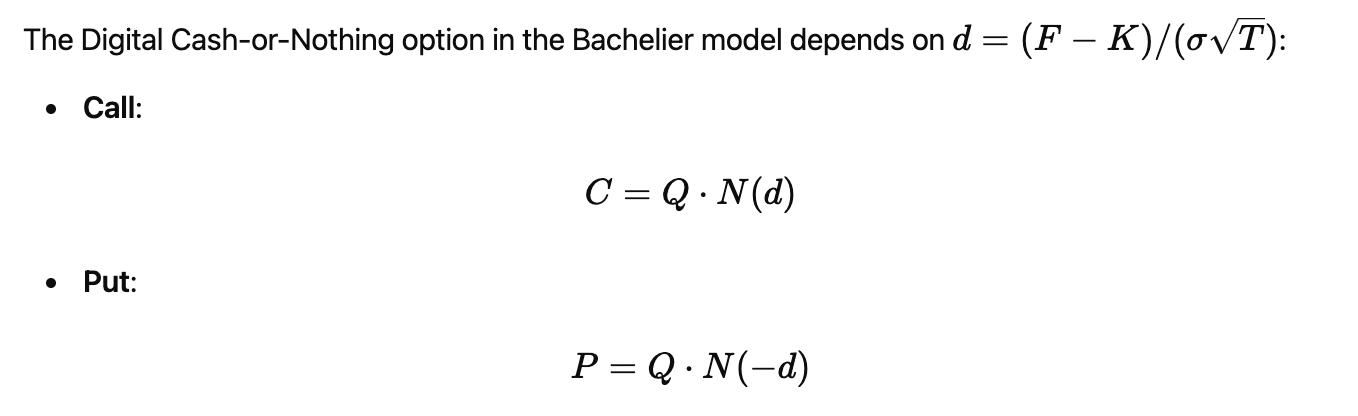

In [17]:
def digital_cash_or_nothing_bachelier(S, K, T, r, sigma, Q, option_type="call"):
    # Forward price
    F = S * np.exp(r * T)
    print(F)
    d = (F - K) / (sigma * np.sqrt(T))
    print(d)
    if option_type == "call":
        price = Q * norm.cdf(d)
    elif option_type == "put":
        price = Q * norm.cdf(-d)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


In [18]:
S = 100      # Spot price
K = 110      # Strike price
T = 1        # Time to maturity (1 year)
r = 0.05     # Risk-free rate
sigma = 5  # Volatility
b = 0.7      # Displacement factor (for Displaced Diffusion)
F = S * np.exp(r * T)  # Forward price (for Black Model)
# print(F)
Q = 10       # Fixed payout (cash)

digital_cash_or_nothing_bachelier(S, K, T, r, sigma, Q, option_type="call")

105.12710963760242
-0.9745780724795168


1.648847974302503

#### Black model
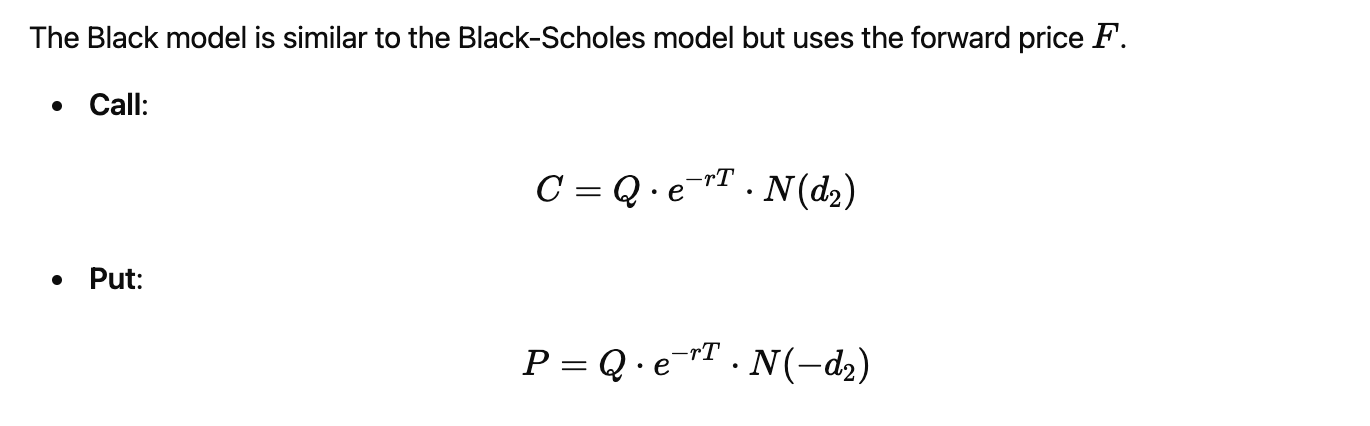

In [20]:
def digital_cash_or_nothing_black(F, K, T, r, sigma, Q, option_type="call"):
    d1 = (np.log(F / K) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        price = Q * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        price = Q * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


#### Displaced-diffusion model
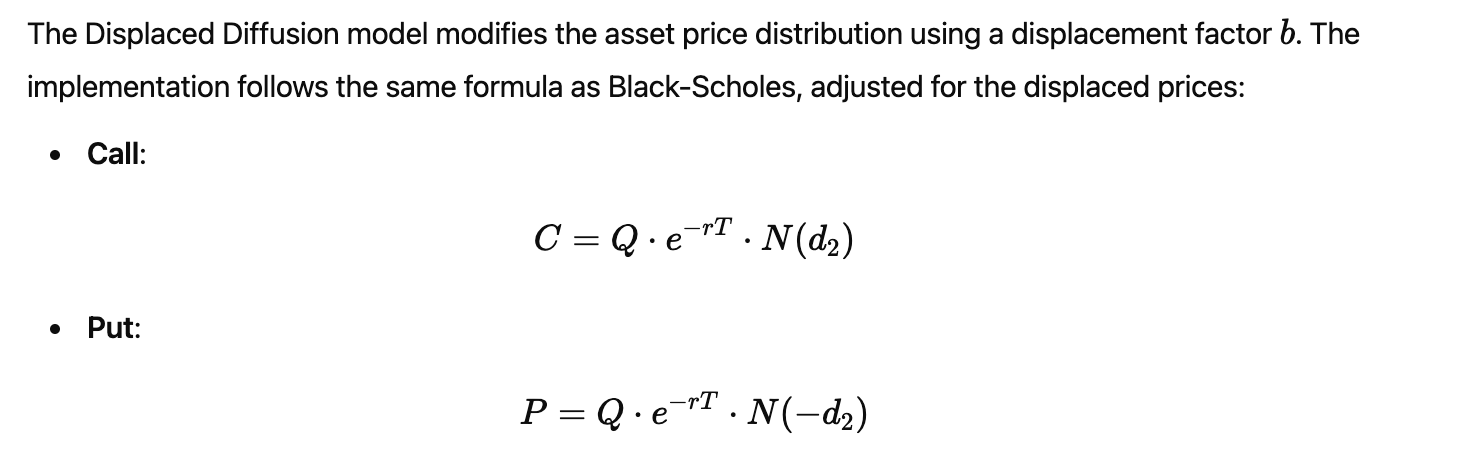

In [22]:
def digital_cash_or_nothing_displaced(S, K, T, r, sigma, Q, b, option_type="call"):
    # Adjusted price and strike
    S_adj = b * S + (1 - b) * K
    K_adj = b * K + (1 - b) * S
    sigma_adj = sigma * b

    # Black-Scholes style d1 and d2
    d1 = (np.log(S_adj / K_adj) + (r + 0.5 * sigma_adj**2) * T) / (sigma_adj * np.sqrt(T))
    d2 = d1 - sigma_adj * np.sqrt(T)
    
    if option_type == "call":
        price = Q * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        price = Q * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


In [23]:
# Parameters
S = 100      # Spot price
K = 110      # Strike price
T = 1        # Time to maturity (1 year)
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility
b = 0.7      # Displacement factor (for Displaced Diffusion)
F = S * np.exp(r * T)  # Forward price (for Black Model)
Q = 10       # Fixed payout (cash)

# Calculate prices
bs_call = digital_cash_or_nothing_black_scholes(S, K, T, r, sigma, Q, option_type="call")
bachelier_call = digital_cash_or_nothing_bachelier(S, K, T, r, sigma, Q, option_type="call")
black_call = digital_cash_or_nothing_black(F, K, T, r, sigma, Q, option_type="call")
displaced_call = digital_cash_or_nothing_displaced(S, K, T, r, sigma, Q, b, option_type="call")

print(f"Black-Scholes Digital Cash-or-Nothing Call Price: {bs_call}")
print(f"Bachelier Digital Cash-or-Nothing Call Price: {bachelier_call}")
print(f"Black Model Digital Cash-or-Nothing Call Price: {black_call}")
print(f"Displaced Diffusion Digital Cash-or-Nothing Call Price: {displaced_call}")


105.12710963760242
-24.36445181198792
Black-Scholes Digital Cash-or-Nothing Call Price: 3.5386095394539416
Bachelier Digital Cash-or-Nothing Call Price: 2.037349906406224e-130
Black Model Digital Cash-or-Nothing Call Price: 3.5386095394539443
Displaced Diffusion Digital Cash-or-Nothing Call Price: 4.813072000915331


## European options 3:
### Digital asset-or-nothing call / put

#### Black-Scholes model
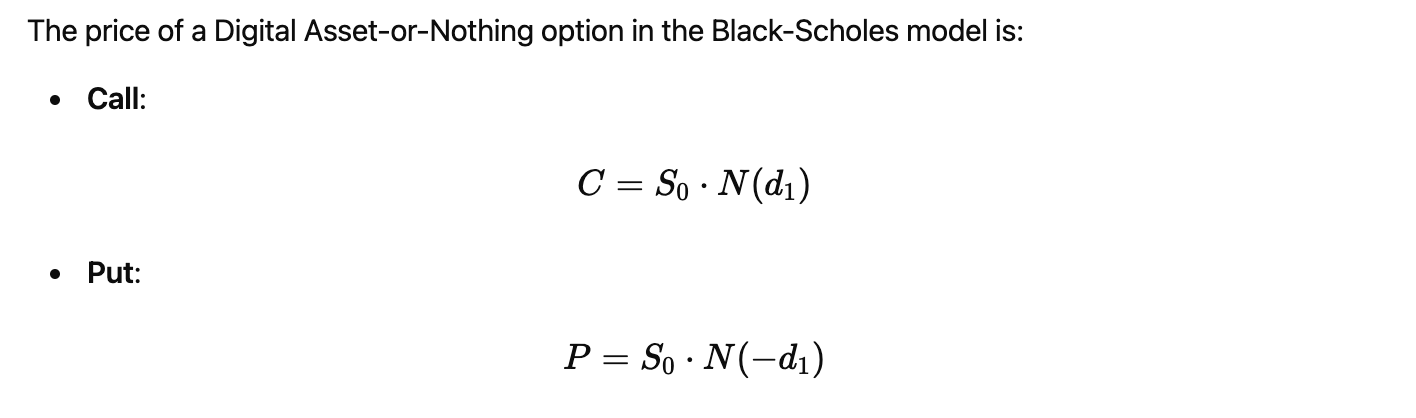

In [26]:
def digital_asset_or_nothing_black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    
    if option_type == "call":
        price = S * norm.cdf(d1)
    elif option_type == "put":
        price = S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


#### Bachelier model
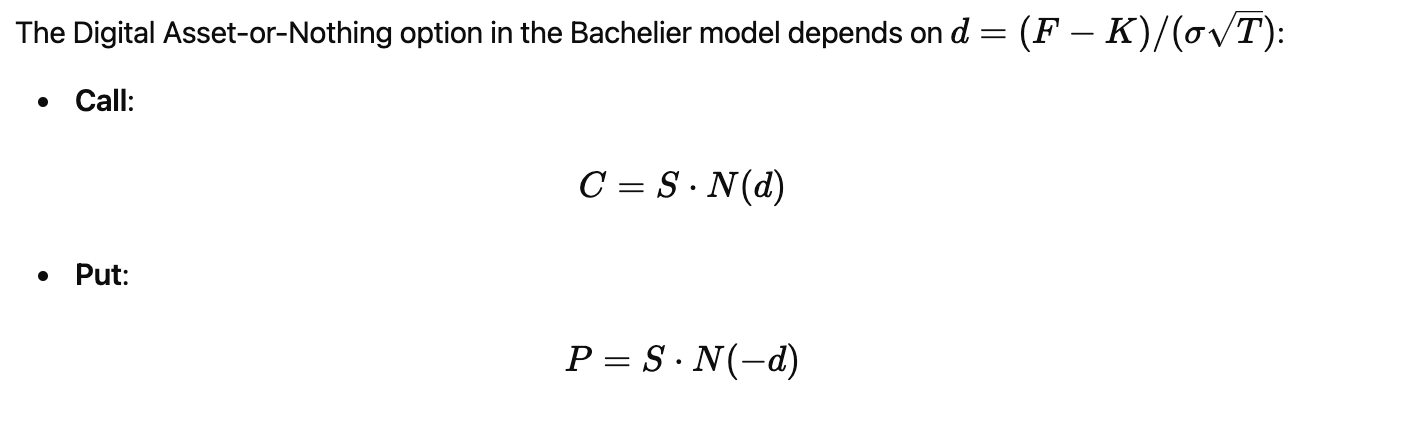

In [28]:
def digital_asset_or_nothing_bachelier(S, K, T, r, sigma, option_type="call"):
    # Forward price
    F = S * np.exp(r * T)
    d = (F - K) / (sigma * np.sqrt(T))
    
    if option_type == "call":
        price = S * norm.cdf(d)
    elif option_type == "put":
        price = S * norm.cdf(-d)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


#### Black model
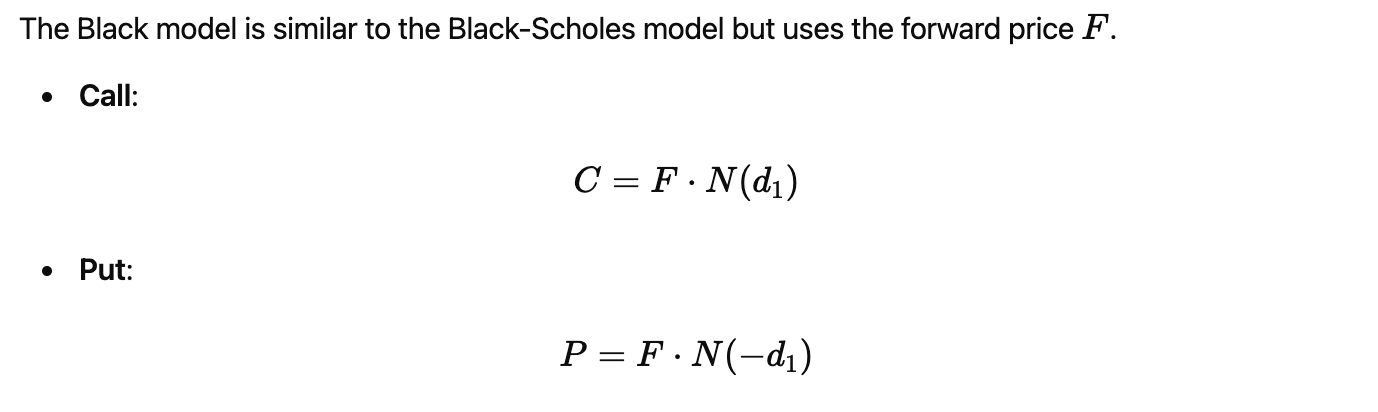

In [30]:
def digital_asset_or_nothing_black(F, K, T, r, sigma, option_type="call"):
    d1 = (np.log(F / K) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    
    if option_type == "call":
        price = F * norm.cdf(d1)
    elif option_type == "put":
        price = F * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


#### Displaced-diffusion model
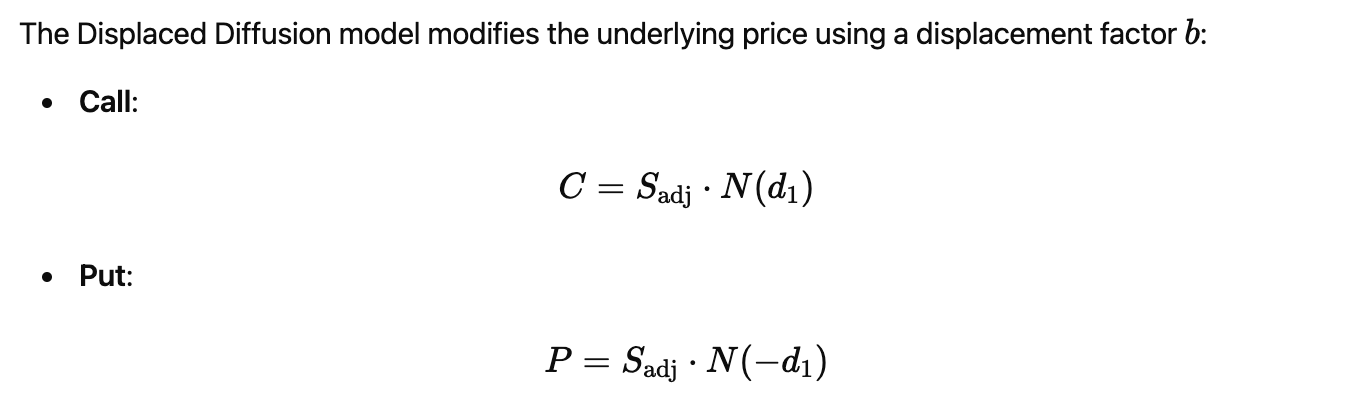

In [32]:
def digital_asset_or_nothing_displaced(S, K, T, r, sigma, b, option_type="call"):
    # Adjusted price and strike
    S_adj = b * S + (1 - b) * K
    K_adj = b * K + (1 - b) * S
    sigma_adj = sigma * b

    # Black-Scholes style d1
    d1 = (np.log(S_adj / K_adj) + (r + 0.5 * sigma_adj**2) * T) / (sigma_adj * np.sqrt(T))
    
    if option_type == "call":
        price = S_adj * norm.cdf(d1)
    elif option_type == "put":
        price = S_adj * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price



In [33]:
# Parameters
S = 100      # Spot price
K = 110      # Strike price
T = 1        # Time to maturity (1 year)
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility
b = 0.7      # Displacement factor (for Displaced Diffusion)
F = S * np.exp(r * T)  # Forward price (for Black Model)

# Calculate prices
bs_call = digital_asset_or_nothing_black_scholes(S, K, T, r, sigma, option_type="call")
bachelier_call = digital_asset_or_nothing_bachelier(S, K, T, r, sigma, option_type="call")
black_call = digital_asset_or_nothing_black(F, K, T, r, sigma, option_type="call")
displaced_call = digital_asset_or_nothing_displaced(S, K, T, r, sigma, b, option_type="call")

print(f"Black-Scholes Digital Asset-or-Nothing Call Price: {bs_call}")
print(f"Bachelier Digital Asset-or-Nothing Call Price: {bachelier_call}")
print(f"Black Model Digital Asset-or-Nothing Call Price: {black_call}")
print(f"Displaced Diffusion Digital Asset-or-Nothing Call Price: {displaced_call}")


Black-Scholes Digital Asset-or-Nothing Call Price: 44.96479306371759
Bachelier Digital Asset-or-Nothing Call Price: 2.037349906406224e-129
Black Model Digital Asset-or-Nothing Call Price: 47.270187302415465
Displaced Diffusion Digital Asset-or-Nothing Call Price: 57.84374675184517


# PART 2

In [35]:
import pandas as pd
import numpy as np

In [36]:
spx_df = pd.read_csv('SPX_options.csv')
spy_df = pd.read_csv('SPY_options.csv')
rates_df = pd.read_csv('zero_rates_20201201.csv')

In [37]:
spx_df.head()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,exercise_style
0,20201201,20201218,C,100000,3547.6,3570.5,E
1,20201201,20201218,C,200000,3447.6,3470.5,E
2,20201201,20201218,C,300000,3347.7,3370.6,E
3,20201201,20201218,C,400000,3247.7,3270.6,E
4,20201201,20201218,C,500000,3147.7,3170.6,E


In [38]:
spy_df.head()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,exercise_style
0,20201201,20201218,C,25000,340.74,341.20,A
1,20201201,20201218,C,50000,315.75,316.21,A
2,20201201,20201218,C,75000,290.75,291.21,A
3,20201201,20201218,C,80000,285.75,286.21,A
4,20201201,20201218,C,85000,280.75,281.21,A


In [183]:
rates_df

,date,days,rate
0,20201201,7,0.102280
1,20201201,13,0.114128
2,20201201,49,0.216480
3,20201201,77,0.220707
4,20201201,104,0.219996
5,20201201,139,0.218208
6,20201201,167,0.216468
7,20201201,195,0.215228
8,20201201,286,0.212862
9,20201201,377,0.214085


## SABR model (beta = 0.7)- SPX

In this notebook we explain how do we generate the volatility smile plot. 

At-the-money (ATM) options are the most liquid - we will look for the option with the strike price ($K$) closest to the forward value $F$, and treat this as the ATM option.

In an earlier notebook, we have covered how to compute implied volatility for a given option price.

Suppose $S=50$, $r=0.01$, $T=10.0$, and suppose the ATM volatility is $\sigma_{LN}=0.50$. Here the subscript "LN" stands for "lognormal".

First, we shall implement the SABR model. The implied Black volatility of the SABR model is given by
  \begin{equation*}
    \begin{split}
      &\sigma_{\mbox{SABR}}(F_0, K, \alpha, \beta, \rho, \nu) \\
      &= \frac{\alpha}{(F_0K)^{(1-\beta)/2}\left\{ 1 + \frac{(1-\beta)^2}{24}\log^2\left(\frac{F_0}{K}\right) + \frac{(1-\beta)^4}{1920}\log^4\left(\frac{F_0}{K}\right) + \cdots\right\} } \\
      &\;\;\;\times \frac{z}{x(z)} \times \left\{ 1 + \left[
          \frac{(1-\beta)^2}{24}
          \frac{\alpha^2}{(F_0K)^{1-\beta}}+\frac{1}{4}\frac{\rho\beta\nu\alpha}{(F_0K)^{(1-\beta)/2}}+\frac{2-3\rho^2}{24}\nu^2\right]
        T + \cdots \right.
    \end{split}
  \end{equation*}
  where
  \begin{equation*}
    \begin{split}
      z = \frac{\nu}{\alpha} (F_0K)^{(1-\beta)/2}
      \log\left(\frac{F_0}{K}\right),
    \end{split}
  \end{equation*}
  and
  \begin{equation*}
    \begin{split}
      x(z) = \log \left[ \frac{\sqrt{1-2\rho z+z^2}+z -\rho}{1-\rho}
      \right].
    \end{split}
  \end{equation*}


This can be implemented in Python as follows:

In [189]:
from scipy.interpolate import interp1d

days_to_expiry_17 = 17
print(days_to_expiry_17)

17


In [191]:
zero_rate_curve = interp1d(rates_df['days'], rates_df['rate'])
rate1 = zero_rate_curve(days_to_expiry_17)
print(rate1)

0.12550044444444444


In [195]:
zero_rate_curve = interp1d(rates_df['days'], rates_df['rate'])
rate2 = zero_rate_curve(45)
print(rate2)

0.20510755555555554


In [197]:
zero_rate_curve = interp1d(rates_df['days'], rates_df['rate'])
rate3 = zero_rate_curve(80)
print(rate3)

0.220628


In [43]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq
import matplotlib.pylab as plt


def SABR(F, K, T, alpha, beta, rho, nu):
    X = K
    # if K is at-the-money-forward
    if abs(F - K) < 1e-12:
        numer1 = (((1 - beta)**2)/24)*alpha*alpha/(F**(2 - 2*beta))
        numer2 = 0.25*rho*beta*nu*alpha/(F**(1 - beta))
        numer3 = ((2 - 3*rho*rho)/24)*nu*nu
        VolAtm = alpha*(1 + (numer1 + numer2 + numer3)*T)/(F**(1-beta))
        sabrsigma = VolAtm
    else:
        z = (nu/alpha)*((F*X)**(0.5*(1-beta)))*np.log(F/X)
        zhi = np.log((((1 - 2*rho*z + z*z)**0.5) + z - rho)/(1 - rho))
        numer1 = (((1 - beta)**2)/24)*((alpha*alpha)/((F*X)**(1 - beta)))
        numer2 = 0.25*rho*beta*nu*alpha/((F*X)**((1 - beta)/2))
        numer3 = ((2 - 3*rho*rho)/24)*nu*nu
        numer = alpha*(1 + (numer1 + numer2 + numer3)*T)*z
        denom1 = ((1 - beta)**2/24)*(np.log(F/X))**2
        denom2 = (((1 - beta)**4)/1920)*((np.log(F/X))**4)
        denom = ((F*X)**((1 - beta)/2))*(1 + denom1 + denom2)*zhi
        sabrsigma = numer/denom

    return sabrsigma


To plot the implied volatility smile for the normal (Bachelier) model, just replaced the "BlackScholesCall" with the Bachelier formula.

Next, we look at the SABR model. The definition above contains the function

\begin{equation*}
\begin{split}
\mbox{SABR}(F, K, T, \alpha, \beta, \rho, \nu)
\end{split}
\end{equation*}

The function returns a volatility $\sigma_{\mbox{SABR}}$ for the Black76Lognormal call or put option formula, so that

\begin{equation*}
\begin{split}
\mbox{Call price} &= \mbox{BlackScholesCall}(S, K, r, \sigma_{\mbox{SABR}}, T) \\
\mbox{Put price} &= \mbox{BlackScholesPut}(S, K, r, \sigma_{\mbox{SABR}}, T) \\
\end{split}
\end{equation*}

How do we determine the parameters $\alpha$, $\rho$ and $\nu$?
- We choose them so that the output of the SABR model matches the implied volatilities observed in the market.
- We refer to this process as "model calibration".

In other words, defining

  \begin{equation*}
    \begin{split}
      \sigma_{\mbox{Mkt}}(K_1) - \mbox{SABR}(F, K_1, T, \alpha, 0.8, \rho, \nu) &= \epsilon_1 \\
      \sigma_{\mbox{Mkt}}(K_2) - \mbox{SABR}(F, K_2, T, \alpha, 0.8, \rho, \nu) &= \epsilon_2 \\
      \vdots&\\
      \sigma_{\mbox{Mkt}}(K_n) - \mbox{SABR}(F, K_n, T, \alpha, 0.8, \rho, \nu) &= \epsilon_n \\
    \end{split}
  \end{equation*}

We want to minimize the sum of squared error terms as follows:
  
  \begin{equation*}
    \begin{split}
      \min_{\substack{\alpha,\; \rho,\; \nu}} \;\sum_{i=1}^n \epsilon_i^2
    \end{split}
  \end{equation*}

We use the "least_squares" algorithm in "scipy" package to calibrate the SABR model parameters:


In [255]:
df = pd.read_csv('SPX_options.csv')
df['mid'] = 0.5*(df['best_bid'] + df['best_offer'])
df['strike'] = df['strike_price']*0.001
df['payoff'] = df['cp_flag'].map(lambda x: 'call' if x == 'C' else 'put')
df

,date,exdate,cp_flag,strike_price,best_bid,best_offer,exercise_style,mid,strike,payoff
0,20201201,20201218,C,100000,3547.6,3570.5,E,3559.05,100.0,call
1,20201201,20201218,C,200000,3447.6,3470.5,E,3459.05,200.0,call
2,20201201,20201218,C,300000,3347.7,3370.6,E,3359.15,300.0,call
3,20201201,20201218,C,400000,3247.7,3270.6,E,3259.15,400.0,call
4,20201201,20201218,C,500000,3147.7,3170.6,E,3159.15,500.0,call
...,...,...,...,...,...,...,...,...,...,...
2067,20201201,20210219,P,5000000,1333.1,1350.5,E,1341.80,5000.0,put
2068,20201201,20210219,P,5100000,1431.8,1454.7,E,1443.25,5100.0,put
2069,20201201,20210219,P,5200000,1531.7,1554.6,E,1543.15,5200.0,put
2070,20201201,20210219,P,5300000,1631.5,1654.4,E,1642.95,5300.0,put


In [293]:
#17 days SABR SPX
from scipy.optimize import least_squares

beta = 0.7

def sabrcalibration(x, strikes, vols, F, T):
    err = 0.0
    for i, vol in enumerate(vols):
        err += (vol - SABR(F, strikes[i], T,
                           x[0], beta, x[1], x[2]))**2

    return err


def impliedVolatility(S, K, r, price, T, payoff):
    try:
        if (payoff.lower() == 'call'):
            impliedVol = brentq(lambda x: price -
                                BlackScholesLognormalCall(S, K, r, x, T),
                                1e-12, 10.0)
        elif (payoff.lower() == 'put'):
            impliedVol = brentq(lambda x: price -
                                BlackScholesLognormalPut(S, K, r, x, T),
                                1e-12, 10.0)
        else:
            raise NameError('Payoff type not recognized')
    except Exception:
        impliedVol = np.nan

    return impliedVol


def BlackScholesLognormalCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)


def BlackScholesLognormalPut(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)


#####
# Here, load DataFrame with strike and implied volatility information into "df"
#####
df = pd.read_csv('SPX_options.csv')
df['mid'] = 0.5*(df['best_bid'] + df['best_offer'])
df['strike'] = df['strike_price']*0.001
df['payoff'] = df['cp_flag'].map(lambda x: 'call' if x == 'C' else 'put')
exdate = sorted(df['exdate'].unique())[0]
df = df[df['exdate'] == exdate]
days_to_expiry = 17
T = days_to_expiry/365
S = 3662.45
r = rate1/100.0
F = S*np.exp(r*T)

df['vols'] = df.apply(lambda x: impliedVolatility(S,
                                                  x['strike'],
                                                  r,
                                                  x['mid'],
                                                  T,
                                                  x['payoff']),
                      axis=1)
df.dropna(inplace=True)
call_df = df[df['payoff'] == 'call']
put_df = df[df['payoff'] == 'put']
strikes = put_df['strike'].values
impliedvols = []
for K in strikes:    
    if K > S:
        impliedvols.append(call_df[call_df['strike'] == K]['vols'].values[0])
    else:
        impliedvols.append(put_df[put_df['strike'] == K]['vols'].values[0])

# populate "df" with the dataframe containing strikes and market implied volatilities
df_17_SPX = pd.DataFrame({'strike': strikes, 'impliedvol': impliedvols})

initialGuess = [0.02, 0.2, 0.1]
res = least_squares(lambda x: sabrcalibration(x,
                                              df_17_SPX['strike'],
                                              df_17_SPX['impliedvol'],
                                              F,
                                              T),
                    initialGuess)
alpha = res.x[0]
rho = res.x[1]
nu = res.x[2]

print('Calibrated SABR model parameters: alpha = %.3f, beta = %.1f, rho = %.3f, nu = %.3f' % (alpha, beta, rho, nu))

sabrvols_17_SPX = []
for K in strikes:
    sabrvols_17_SPX.append(SABR(F, K, T, alpha, beta, rho, nu))

/var/folders/cw/4zz2f1550yb6g708rq8sffg40000gn/T/ipykernel_60230/3718649375.py:19: RuntimeWarning: invalid value encountered in scalar power
  zhi = np.log((((1 - 2*rho*z + z*z)**0.5) + z - rho)/(1 - rho))
/var/folders/cw/4zz2f1550yb6g708rq8sffg40000gn/T/ipykernel_60230/3718649375.py:19: RuntimeWarning: invalid value encountered in log
  zhi = np.log((((1 - 2*rho*z + z*z)**0.5) + z - rho)/(1 - rho))


Calibrated SABR model parameters: alpha = 1.212, beta = 0.7, rho = -0.301, nu = 5.460


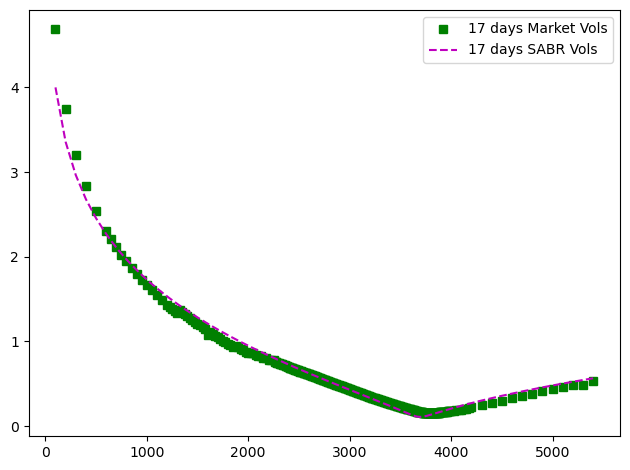

In [294]:
plt.figure(tight_layout=True)
plt.plot(strikes, df_17_SPX['impliedvol'], 'gs', label='17 days Market Vols')
plt.plot(strikes, sabrvols_17_SPX, 'm--', label='17 days SABR Vols')
plt.legend()
plt.show()

In [259]:
df_17

,strike,impliedvol
0,100.0,4.685324
1,200.0,3.741195
2,300.0,3.204791
3,400.0,2.830325
4,500.0,2.542973
...,...,...
406,5000.0,0.436196
407,5100.0,0.461523
408,5200.0,0.486234
409,5300.0,0.486495


In [299]:
#45 days SABR
#####
# Here, load DataFrame with strike and implied volatility information into "df"
#####
df = pd.read_csv('SPX_options.csv')
df['mid'] = 0.5*(df['best_bid'] + df['best_offer'])
df['strike'] = df['strike_price']*0.001
df['payoff'] = df['cp_flag'].map(lambda x: 'call' if x == 'C' else 'put')
exdate = sorted(df['exdate'].unique())[0]
df = df[df['exdate'] == exdate]
days_to_expiry = 45
T = days_to_expiry/365
S = 3662.45
r = rate2/100.0
F = S*np.exp(r*T)

df['vols'] = df.apply(lambda x: impliedVolatility(S,
                                                  x['strike'],
                                                  r,
                                                  x['mid'],
                                                  T,
                                                  x['payoff']),
                      axis=1)
df.dropna(inplace=True)
call_df = df[df['payoff'] == 'call']
put_df = df[df['payoff'] == 'put']
strikes = put_df['strike'].values
impliedvols = []
for K in strikes:    
    if K > S:
        impliedvols.append(call_df[call_df['strike'] == K]['vols'].values[0])
    else:
        impliedvols.append(put_df[put_df['strike'] == K]['vols'].values[0])

# populate "df" with the dataframe containing strikes and market implied volatilities
df_45_SPX = pd.DataFrame({'strike': strikes, 'impliedvol': impliedvols})

initialGuess = [0.02, 0.2, 0.1]
res = least_squares(lambda x: sabrcalibration(x,
                                              df_45_SPX['strike'],
                                              df_45_SPX['impliedvol'],
                                              F,
                                              T),
                    initialGuess)
alpha = res.x[0]
rho = res.x[1]
nu = res.x[2]

print('Calibrated SABR model parameters: alpha = %.3f, beta = %.1f, rho = %.3f, nu = %.3f' % (alpha, beta, rho, nu))

sabrvols_45_SPX = []
for K in strikes:
    sabrvols_45_SPX.append(SABR(F, K, T, alpha, beta, rho, nu))

Calibrated SABR model parameters: alpha = 0.745, beta = 0.7, rho = -0.303, nu = 3.355


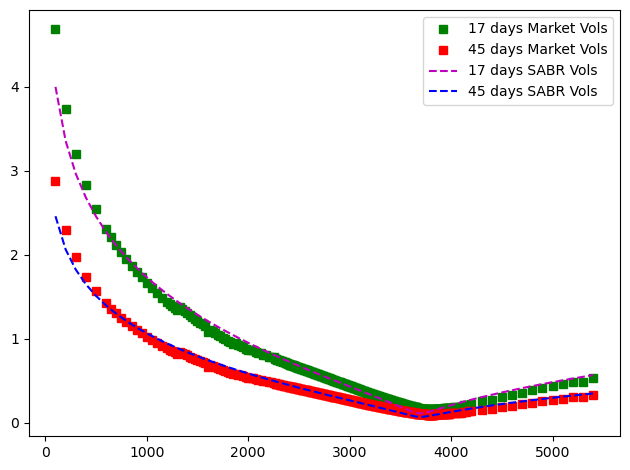

In [300]:
plt.figure(tight_layout=True)
plt.plot(strikes, df_17_SPX['impliedvol'], 'gs', label='17 days Market Vols')
plt.plot(strikes, df_45_SPX['impliedvol'], 'rs', label='45 days Market Vols')
plt.plot(strikes, sabrvols_17_SPX, 'm--', label='17 days SABR Vols')
plt.plot(strikes, sabrvols_45_SPX, 'b--', label='45 days SABR Vols')
plt.legend()
plt.show()

In [303]:
#####
# Here, load DataFrame with strike and implied volatility information into "df"
#####
df = pd.read_csv('SPX_options.csv')
df['mid'] = 0.5*(df['best_bid'] + df['best_offer'])
df['strike'] = df['strike_price']*0.001
df['payoff'] = df['cp_flag'].map(lambda x: 'call' if x == 'C' else 'put')
exdate = sorted(df['exdate'].unique())[0]
df = df[df['exdate'] == exdate]
days_to_expiry = 80
T = days_to_expiry/365
S = 3662.45
r = rate3/100.0
F = S*np.exp(r*T)

df['vols'] = df.apply(lambda x: impliedVolatility(S,
                                                  x['strike'],
                                                  r,
                                                  x['mid'],
                                                  T,
                                                  x['payoff']),
                      axis=1)
df.dropna(inplace=True)
call_df = df[df['payoff'] == 'call']
put_df = df[df['payoff'] == 'put']
strikes = put_df['strike'].values
impliedvols = []
for K in strikes:    
    if K > S:
        impliedvols.append(call_df[call_df['strike'] == K]['vols'].values[0])
    else:
        impliedvols.append(put_df[put_df['strike'] == K]['vols'].values[0])

# populate "df" with the dataframe containing strikes and market implied volatilities
df_80_SPX = pd.DataFrame({'strike': strikes, 'impliedvol': impliedvols})

initialGuess = [0.02, 0.2, 0.1]
res = least_squares(lambda x: sabrcalibration(x,
                                              df_80_SPX['strike'],
                                              df_80_SPX['impliedvol'],
                                              F,
                                              T),
                    initialGuess)
alpha = res.x[0]
rho = res.x[1]
nu = res.x[2]

print('Calibrated SABR model parameters: alpha = %.3f, beta = %.1f, rho = %.3f, nu = %.3f' % (alpha, beta, rho, nu))

sabrvols_80_SPX = []
for K in strikes:
    sabrvols_80_SPX.append(SABR(F, K, T, alpha, beta, rho, nu))

Calibrated SABR model parameters: alpha = 0.559, beta = 0.7, rho = -0.306, nu = 2.516


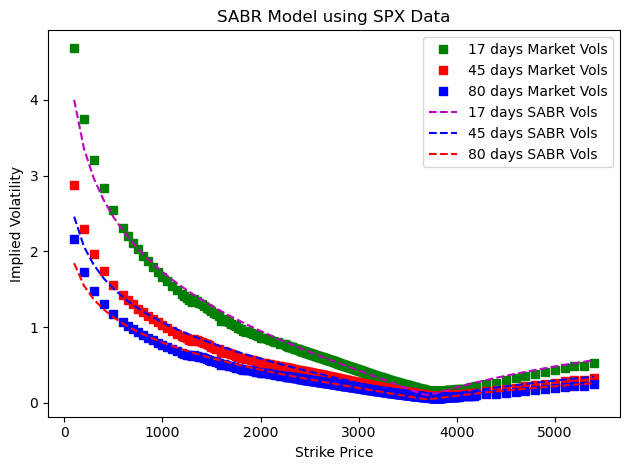

In [305]:
plt.figure(tight_layout=True)
plt.plot(strikes, df_17_SPX['impliedvol'], 'gs', label='17 days Market Vols')
plt.plot(strikes, df_45_SPX['impliedvol'], 'rs', label='45 days Market Vols')
plt.plot(strikes, df_80_SPX['impliedvol'], 'bs', label='80 days Market Vols')
plt.plot(strikes, sabrvols_17_SPX, 'm--', label='17 days SABR Vols')
plt.plot(strikes, sabrvols_45_SPX, 'b--', label='45 days SABR Vols')
plt.plot(strikes, sabrvols_80_SPX, 'r--', label='80 days SABR Vols')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('SABR Model using SPX Data')
plt.legend()
plt.show()

## SABR model (beta = 0.7)- SPY

In [307]:
#####
# Here, load DataFrame with strike and implied volatility information into "df"
#####
df = pd.read_csv('SPY_options.csv')
df['mid'] = 0.5*(df['best_bid'] + df['best_offer'])
df['strike'] = df['strike_price']*0.001
df['payoff'] = df['cp_flag'].map(lambda x: 'call' if x == 'C' else 'put')
exdate = sorted(df['exdate'].unique())[0]
df = df[df['exdate'] == exdate]
days_to_expiry = 17
T = days_to_expiry/365
S = 366.02
r = rate1/100.0
F = S*np.exp(r*T)

df['vols'] = df.apply(lambda x: impliedVolatility(S,
                                                  x['strike'],
                                                  r,
                                                  x['mid'],
                                                  T,
                                                  x['payoff']),
                      axis=1)
df.dropna(inplace=True)
call_df = df[df['payoff'] == 'call']
put_df = df[df['payoff'] == 'put']
strikes = put_df['strike'].values
impliedvols = []
for K in strikes:    
    if K > S:
        impliedvols.append(call_df[call_df['strike'] == K]['vols'].values[0])
    else:
        impliedvols.append(put_df[put_df['strike'] == K]['vols'].values[0])

# populate "df" with the dataframe containing strikes and market implied volatilities
df_17_SPY = pd.DataFrame({'strike': strikes, 'impliedvol': impliedvols})

initialGuess = [0.02, 0.2, 0.1]
res = least_squares(lambda x: sabrcalibration(x,
                                              df_17_SPY['strike'],
                                              df_17_SPY['impliedvol'],
                                              F,
                                              T),
                    initialGuess)
alpha = res.x[0]
rho = res.x[1]
nu = res.x[2]

print('Calibrated SABR model parameters: alpha = %.3f, beta = %.1f, rho = %.3f, nu = %.3f' % (alpha, beta, rho, nu))

sabrvols_17_SPY = []
for K in strikes:
    sabrvols_17_SPY.append(SABR(F, K, T, alpha, beta, rho, nu))

Calibrated SABR model parameters: alpha = 0.665, beta = 0.7, rho = -0.412, nu = 5.250


In [309]:
#####
# Here, load DataFrame with strike and implied volatility information into "df"
#####
df = pd.read_csv('SPY_options.csv')
df['mid'] = 0.5*(df['best_bid'] + df['best_offer'])
df['strike'] = df['strike_price']*0.001
df['payoff'] = df['cp_flag'].map(lambda x: 'call' if x == 'C' else 'put')
exdate = sorted(df['exdate'].unique())[0]
df = df[df['exdate'] == exdate]
days_to_expiry = 45
T = days_to_expiry/365
S = 366.02
r = rate2/100.0
F = S*np.exp(r*T)

df['vols'] = df.apply(lambda x: impliedVolatility(S,
                                                  x['strike'],
                                                  r,
                                                  x['mid'],
                                                  T,
                                                  x['payoff']),
                      axis=1)
df.dropna(inplace=True)
call_df = df[df['payoff'] == 'call']
put_df = df[df['payoff'] == 'put']
strikes = put_df['strike'].values
impliedvols = []
for K in strikes:    
    if K > S:
        impliedvols.append(call_df[call_df['strike'] == K]['vols'].values[0])
    else:
        impliedvols.append(put_df[put_df['strike'] == K]['vols'].values[0])

# populate "df" with the dataframe containing strikes and market implied volatilities
df_45_SPY = pd.DataFrame({'strike': strikes, 'impliedvol': impliedvols})

initialGuess = [0.02, 0.2, 0.1]
res = least_squares(lambda x: sabrcalibration(x,
                                              df_45_SPY['strike'],
                                              df_45_SPY['impliedvol'],
                                              F,
                                              T),
                    initialGuess)
alpha = res.x[0]
rho = res.x[1]
nu = res.x[2]

print('Calibrated SABR model parameters: alpha = %.3f, beta = %.1f, rho = %.3f, nu = %.3f' % (alpha, beta, rho, nu))

sabrvols_45_SPY = []
for K in strikes:
    sabrvols_45_SPY.append(SABR(F, K, T, alpha, beta, rho, nu))

Calibrated SABR model parameters: alpha = 0.409, beta = 0.7, rho = -0.413, nu = 3.226


In [311]:
#####
# Here, load DataFrame with strike and implied volatility information into "df"
#####
df = pd.read_csv('SPY_options.csv')
df['mid'] = 0.5*(df['best_bid'] + df['best_offer'])
df['strike'] = df['strike_price']*0.001
df['payoff'] = df['cp_flag'].map(lambda x: 'call' if x == 'C' else 'put')
exdate = sorted(df['exdate'].unique())[0]
df = df[df['exdate'] == exdate]
days_to_expiry = 80
T = days_to_expiry/365
S = 366.02
r = rate3/100.0
F = S*np.exp(r*T)

df['vols'] = df.apply(lambda x: impliedVolatility(S,
                                                  x['strike'],
                                                  r,
                                                  x['mid'],
                                                  T,
                                                  x['payoff']),
                      axis=1)
df.dropna(inplace=True)
call_df = df[df['payoff'] == 'call']
put_df = df[df['payoff'] == 'put']
strikes = put_df['strike'].values
impliedvols = []
for K in strikes:    
    if K > S:
        impliedvols.append(call_df[call_df['strike'] == K]['vols'].values[0])
    else:
        impliedvols.append(put_df[put_df['strike'] == K]['vols'].values[0])

# populate "df" with the dataframe containing strikes and market implied volatilities
df_80_SPY = pd.DataFrame({'strike': strikes, 'impliedvol': impliedvols})

initialGuess = [0.02, 0.2, 0.1]
res = least_squares(lambda x: sabrcalibration(x,
                                              df_80_SPY['strike'],
                                              df_80_SPY['impliedvol'],
                                              F,
                                              T),
                    initialGuess)
alpha = res.x[0]
rho = res.x[1]
nu = res.x[2]

print('Calibrated SABR model parameters: alpha = %.3f, beta = %.1f, rho = %.3f, nu = %.3f' % (alpha, beta, rho, nu))

sabrvols_80_SPY = []
for K in strikes:
    sabrvols_80_SPY.append(SABR(F, K, T, alpha, beta, rho, nu))

Calibrated SABR model parameters: alpha = 0.306, beta = 0.7, rho = -0.415, nu = 2.421


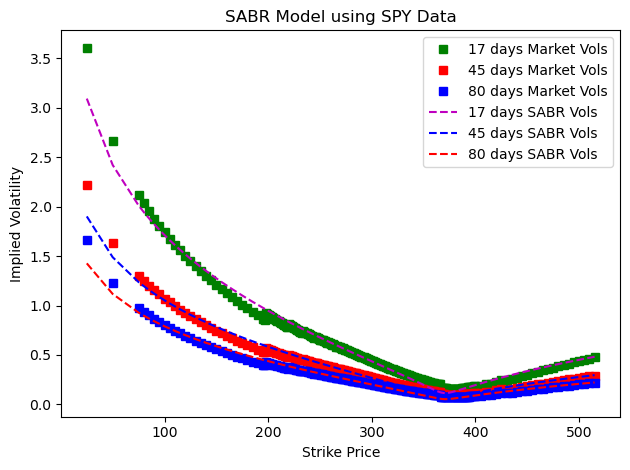

In [313]:
plt.figure(tight_layout=True)
plt.plot(strikes, df_17_SPY['impliedvol'], 'gs', label='17 days Market Vols')
plt.plot(strikes, df_45_SPY['impliedvol'], 'rs', label='45 days Market Vols')
plt.plot(strikes, df_80_SPY['impliedvol'], 'bs', label='80 days Market Vols')
plt.plot(strikes, sabrvols_17_SPY, 'm--', label='17 days SABR Vols')
plt.plot(strikes, sabrvols_45_SPY, 'b--', label='45 days SABR Vols')
plt.plot(strikes, sabrvols_80_SPY, 'r--', label='80 days SABR Vols')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('SABR Model using SPY Data')
plt.legend()
plt.show()

## Displaced Diffusion Model

In [380]:
"""
Authors     : Andre Lim & Joseph Adhika
Tests       : option_types.test_option_models.test_displaced_diffusion_model.py
Description : Mark Rubinstein's Displaced Diffusion Model following lecture notes
"""
import numpy as np
from scipy.stats import norm

from .abstract_option_model import AbstractOptionModel


class AbstractDisplacedDiffusionModel(AbstractOptionModel):
    """
    Displaced diffusion is extension of Black76 with an additional parameter beta
    ...
    Parameters
    ----------
    S : float
        The current price of the underlying asset
    K : float
        The strike price of the options
    r : float
        Risk free interest rate (decimal)
    sigma : float
        Volatility
    T : float
        Maturity period (years)
    beta : float
        Displaced diffusion model parameter (0,1], but lecture notes say [0,1]
        https://ink.library.smu.edu.sg/cgi/viewcontent.cgi?article=6976&context=lkcsb_research
    """

    def __init__(
        self, S: float, K: float, r: float, sigma: float, T: float, beta: float
    ):
        self.S = S
        self.K = K
        self.r = r
        self.sigma = sigma
        self.T = T
        self.beta = beta

        self.F = S * np.exp(r * T)
        self.adjusted_F = self.F / self.beta
        self.adjusted_K = self.K + ((1 - self.beta) / self.beta) * self.F
        self.adjusted_sigma = self.sigma * self.beta
        self.discount_factor = np.exp(-self.r * self.T)

        self.d1 = self._calculate_d1()
        self.d2 = self._calculate_d2()

    def _calculate_d1(self) -> float:
        return (
            np.log(self.adjusted_F / self.adjusted_K)
            + 0.5 * self.adjusted_sigma**2 * self.T
        ) / (self.adjusted_sigma * np.sqrt(self.T))

    def _calculate_d2(self) -> float:
        return self.d1 - self.adjusted_sigma * np.sqrt(self.T)


class VanillaDisplacedDiffusionModel(AbstractDisplacedDiffusionModel):
    def calculate_call_price(self) -> float:
        return self.discount_factor * (
            self.adjusted_F * norm.cdf(self.d1) - self.adjusted_K * norm.cdf(self.d2)
        )

    def calculate_put_price(self) -> float:
        return self.discount_factor * (
            self.adjusted_K * norm.cdf(-self.d2) - self.adjusted_F * norm.cdf(-self.d1)
        )


class DigitalCashOrNothingDisplacedDiffusionModel(AbstractDisplacedDiffusionModel):
    def calculate_call_price(self) -> float:
        return self.discount_factor * norm.cdf(self.d2)

    def calculate_put_price(self) -> float:
        return self.discount_factor * norm.cdf(-self.d2)


class DigitalAssetOrNothingDisplacedDiffusionModel(AbstractDisplacedDiffusionModel):
    def calculate_call_price(self) -> float:
        return self.discount_factor * self.adjusted_F * norm.cdf(self.d1)

    def calculate_put_price(self) -> float:
        return self.discount_factor * self.adjusted_F * norm.cdf(-self.d1)


ImportError: attempted relative import with no known parent package